In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_decision_forests as tfdf
import tensorflow as tf
from sklearn.linear_model import LinearRegression,  LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

/kaggle/input/playground-series-s3e18/sample_submission.csv
/kaggle/input/playground-series-s3e18/train.csv
/kaggle/input/playground-series-s3e18/test.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/playground-series-s3e18/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s3e18/test.csv')
sample_df = pd.read_csv('/kaggle/input/playground-series-s3e18/sample_submission.csv')

In [3]:
train_df.head()

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
0,0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,...,4.794537,35.527357,0,0,1,1,0,0,0,0
1,1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,...,13.825658,44.707310,0,0,0,1,1,0,0,0
2,2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,...,17.964475,45.660120,0,0,1,1,0,0,1,0
3,3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,...,31.961948,87.509997,0,0,1,1,0,0,0,0
4,4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,...,9.589074,33.333333,2,2,1,0,1,1,1,0


In [4]:
sample_df.head()

,id,EC1,EC2
0,14838,0.5,0.5
1,14839,0.5,0.5
2,14840,0.5,0.5
3,14841,0.5,0.5
4,14842,0.5,0.5


In [5]:
test_df.head()

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2
0,14838,344.632371,7.283603,4.473966,5.834958,3.412257,4.651530,2.096558,1.116433,49.458581,...,13.512441,0.000000,0.000000,0.000000,26.809272,24.539800,4.794537,47.304082,1,1
1,14839,1432.410201,10.663869,7.079026,8.065215,5.297097,5.297097,3.924155,2.569694,0.000000,...,0.000000,34.947374,98.323987,9.606882,0.000000,53.378235,0.000000,43.166667,0,0
2,14840,83.352608,3.931852,1.774215,1.774215,1.073446,1.073446,0.467830,0.170838,5.969305,...,5.969305,0.000000,0.000000,6.420822,11.752550,13.344559,9.589074,24.666667,1,1
3,14841,150.255712,5.912790,3.548812,3.548812,2.595128,2.595128,1.642813,0.694113,0.000000,...,59.935299,0.000000,0.000000,0.000000,17.744066,32.290168,4.794537,26.778866,0,0
4,14842,1817.276351,24.910940,15.540529,20.047314,12.535886,17.730988,11.979618,4.431173,84.554972,...,23.468091,25.609359,0.000000,37.099000,69.141353,38.704130,50.697492,102.583333,0,0


                         id   BertzCT      Chi1     Chi1n     Chi1v     Chi2n  \
id                 1.000000  0.000513 -0.000205  0.000628 -0.000636  0.001795   
BertzCT            0.000513  1.000000  0.927629  0.906521  0.922312  0.897368   
Chi1              -0.000205  0.927629  1.000000  0.973500  0.978411  0.960249   
Chi1n              0.000628  0.906521  0.973500  1.000000  0.977010  0.983607   
Chi1v             -0.000636  0.922312  0.978411  0.977010  1.000000  0.962441   
Chi2n              0.001795  0.897368  0.960249  0.983607  0.962441  1.000000   
Chi2v             -0.000079  0.919101  0.971049  0.968451  0.986538  0.970987   
Chi3v              0.000583  0.908613  0.960650  0.965798  0.970371  0.971534   
Chi4n              0.002625  0.818730  0.879138  0.914214  0.877441  0.934039   
EState_VSA1       -0.014450  0.722450  0.752059  0.697719  0.745145  0.684409   
EState_VSA2        0.005956  0.664584  0.674461  0.663377  0.674537  0.655004   
ExactMolWt        -0.000420 

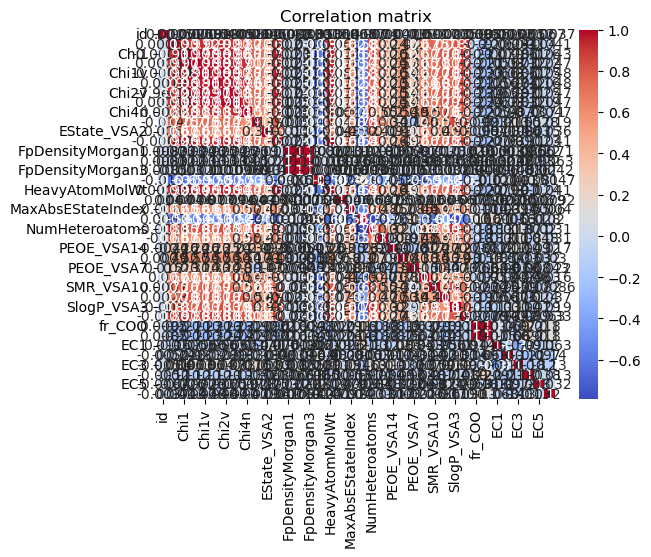

In [6]:
corr = train_df.corr()

# Display the correlation matrix
print(corr)

# Use seaborn to visualize the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

In [7]:
primary_labels = ["EC1"]
secondary_labels = ["EC2","EC3", "EC4", "EC5", "EC6"]
non_feature_columns = ["id"]

In [8]:
def to_tf_dataset(pd_dataset: pd.DataFrame, label_keys: list[str], droped_features: list[str]) -> tf.data.Dataset:
    features = pd_dataset.drop(label_keys + droped_features, axis=1)
    labels = pd_dataset[label_keys]
    return tf.data.Dataset.from_tensor_slices((features, labels)).batch(100)

train_tf_ec1 = to_tf_dataset(train_df, label_keys=primary_labels, droped_features=non_feature_columns + secondary_labels)
primary_labels = ["EC2"]
secondary_labels = ['id',"EC1","EC3", "EC4", "EC5", "EC6"]
train_tf_ec2 = to_tf_dataset(train_df, label_keys=primary_labels, droped_features=non_feature_columns + secondary_labels)
test_tf = to_tf_dataset(test_df, label_keys=[], droped_features=non_feature_columns)

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler


x = train_df.drop(columns=['id','EC1','EC2',"EC3", "EC4", "EC5", "EC6"])
x_test = test_df.drop(columns=['id'])

y1 = train_df['EC1']
y2 = train_df['EC2']

model_rf1 = RandomForestClassifier(n_estimators=1000)
model_rf1.fit(x, y1)
model_xgb1 = XGBClassifier(n_estimators=100, max_depth = 4)
model_xgb1.fit(x,y1)
model_gbt1 = tfdf.keras.GradientBoostedTreesModel()
model_gbt1.fit(train_tf_ec1)
model_lgb1 = LGBMClassifier()
model_lgb1.fit(x,y1)

Use /tmp/tmpv7j6fn_c as temporary training directory
Reading training dataset...


[WARNING 23-07-07 20:42:18.2842 UTC gradient_boosted_trees.cc:1797] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 23-07-07 20:42:18.2846 UTC gradient_boosted_trees.cc:1808] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 23-07-07 20:42:18.2847 UTC gradient_boosted_trees.cc:1822] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:07.470941. Found 14838 examples.
Training model...
Model trained in 0:00:03.237149
Compiling model...


[INFO 23-07-07 20:42:29.0241 UTC kernel.cc:1242] Loading model from path /tmp/tmpv7j6fn_c/model/ with prefix 16ec75743ca940fd
[INFO 23-07-07 20:42:29.0341 UTC abstract_model.cc:1311] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 23-07-07 20:42:29.0344 UTC kernel.cc:1074] Use fast generic engine


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


LGBMClassifier()

In [10]:
model_rf2 = RandomForestClassifier(n_estimators=1000)
model_rf2.fit(x, y2)
model_xgb2 = XGBClassifier(n_estimators=100, max_depth = 4)
model_xgb2.fit(x,y2)
model_nb2 = BernoulliNB()
model_nb2.fit(x,y2)
model_knn = KNeighborsClassifier(n_neighbors=500, weights='distance')
model_knn.fit(x,y2)
model_lgb2 = LGBMClassifier()
model_lgb2.fit(x,y2)
#model_gbt2 = tfdf.keras.GradientBoostedTreesModel()
#model_gbt2.fit(train_tf_ec2)

LGBMClassifier()

In [11]:

prediction_rf1 = model_rf1.predict_proba(x_test)
prediction_rf2 = model_rf2.predict_proba(x_test)
prediction_nb = model_nb2.predict_proba(x_test)
prediction_xgb1 = model_xgb1.predict_proba(x_test)
prediction_xgb2 = model_xgb2.predict_proba(x_test)
prediction_gbt1 = model_gbt1.predict(test_tf)
prediction_knn = model_knn.predict_proba(x_test)
prediction_lgb1 = model_lgb1.predict_proba(x_test)
prediction_lgb2 = model_lgb2.predict_proba(x_test)
#prediction_gbt2 = model_gbt2.predict(test_tf)

99/99 [==============================] - 0s 2ms/step


In [12]:
prediction1_rf = pd.DataFrame(prediction_rf1, columns=["not_EC1", "EC1"])
prediction2_rf = pd.DataFrame(prediction_rf2, columns=["not_EC2", "EC2"])
prediction2_nb = pd.DataFrame(prediction_nb, columns=["not_EC2", "EC2"])
prediction1_xgb = pd.DataFrame(prediction_rf1, columns=["not_EC1", "EC1"])
prediction2_xgb = pd.DataFrame(prediction_rf2, columns=["not_EC2", "EC2"])
prediction2_knn = pd.DataFrame(prediction_knn, columns=["not_EC2", "EC2"])
prediction1_lgb = pd.DataFrame(prediction_lgb1, columns=["not_EC1", "EC1"])
prediction2_lgb = pd.DataFrame(prediction_lgb2, columns=["not_EC2", "EC2"])
prediction_gbt1= prediction_gbt1.flatten()
#prediction_gbt2= prediction_gbt2.flatten()


prediction_pd = pd.DataFrame(columns=["id", "EC1", "EC2"])
prediction_pd["EC1"] = (prediction1_lgb["EC1"]+prediction1_rf["EC1"]+prediction_gbt1+ prediction1_xgb["EC1"])/4.0
prediction_pd["EC2"] = (prediction2_lgb["EC2"]+prediction2_rf["EC2"]+prediction2_nb["EC2"] + prediction2_xgb["EC2"] +prediction2_knn["EC2"])/5.0
prediction_pd["id"] = test_df["id"]
prediction_pd.head()

,id,EC1,EC2
0,14838,0.434335,0.748695
1,14839,0.796465,0.812912
2,14840,0.768334,0.720828
3,14841,0.728540,0.829584
4,14842,0.785764,0.799901


In [13]:

prediction_pd.head()

,id,EC1,EC2
0,14838,0.434335,0.748695
1,14839,0.796465,0.812912
2,14840,0.768334,0.720828
3,14841,0.728540,0.829584
4,14842,0.785764,0.799901


In [14]:
"""prediction_pd = pd.DataFrame({
    "id": test_df["id"],
    "EC1": interim1,
    "EC2": prediction_ec2.flatten(),
})"""



'prediction_pd = pd.DataFrame({\n    "id": test_df["id"],\n    "EC1": interim1,\n    "EC2": prediction_ec2.flatten(),\n})'

In [15]:
prediction_pd.to_csv("submission.csv",index=False)